In [ ]:
from plotnine import ggplot, aes, geom_point, labs, facet_wrap, geom_vline, theme_minimal, theme, element_text
import pandas as pd

In [ ]:
acc_dict = {
    'BIC.0':            {'acc_1': 72.87, 'acc_2': 53.65},
    'constant.1':       {'acc_1': 73.40, 'acc_2': 55.58},
    'linear.2':         {'acc_1': 78.98, 'acc_2': 73.20},
    'linear.6':         {'acc_1': 79.25, 'acc_2': 76.34},
    'linear.8':         {'acc_1': 79.11, 'acc_2': 73.75},
    'mlp.1.8':          {'acc_1': 81.32, 'acc_2': 79.04},
    'mlp.2.16':         {'acc_1': 80.10, 'acc_2': 76.53},
}

acc_1 = [values['acc_1'] for values in acc_dict.values()]
acc_2 = [values['acc_2'] for values in acc_dict.values()]

data_fold1 = pd.DataFrame({
    'Method': list(acc_dict.keys()),
    'Accuracy': acc_1,
    'Fold': 'Fold 1 Test'
})

# Creating data for fold 2
data_fold2 = pd.DataFrame({
    'Method': list(acc_dict.keys()),
    'Accuracy': acc_2,
    'Fold': 'Fold 2 Test'
})

# Combining data for both folds
data = pd.concat([data_fold1, data_fold2])

# Order methods by accuracy
method_order = data.groupby('Method')['Accuracy'].mean().sort_values(ascending=False).index

# Convert Method column to categorical with the desired order
data['Method'] = pd.Categorical(data['Method'], categories=method_order, ordered=True)

# Plotting with different shapes for each algorithm
plot_combined = (ggplot(data, aes(x='Accuracy', y='Method')) +
                geom_point(size=1) +
                labs(title="",
                    x="Accuracy Percentage",
                    y="Method") +
                facet_wrap('~Fold', ncol=2) +
                geom_vline(xintercept=90, color="black", size=1) +
                theme_minimal() +
                theme(legend_position='bottom', text=element_text(size=8)) +
                theme(aspect_ratio=1)
                )  # Adjust aspect ratio to decrease the distance between methods

print(plot_combined)

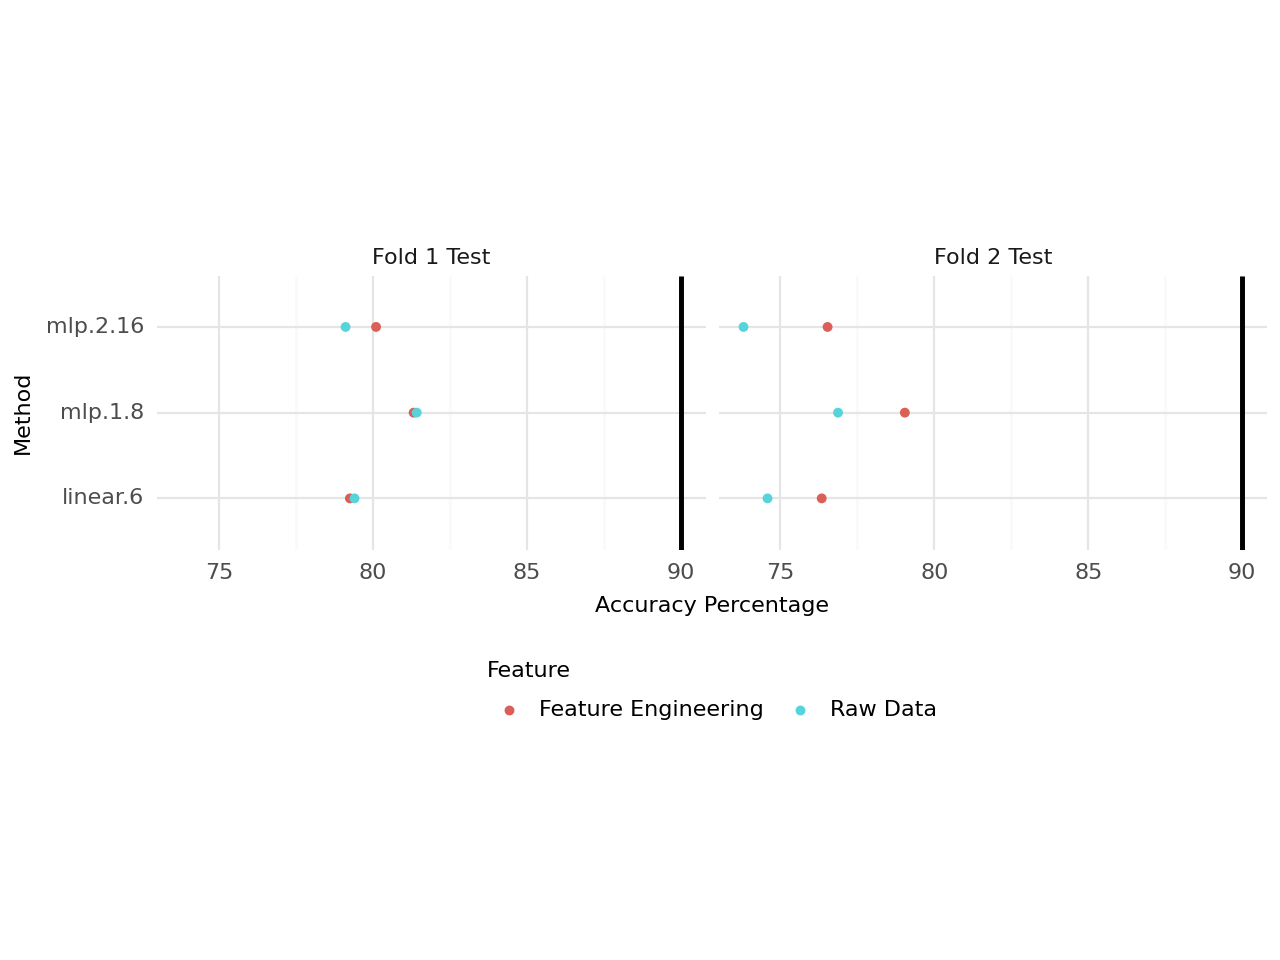

In [39]:
import pandas as pd
from plotnine import *

# Data
methods = ['linear.6', 'linear.6', 'mlp.1.8', 'mlp.1.8', 'mlp.2.16', 'mlp.2.16']
f_e     = ['Feature Engineering', 'Raw Data', 'Feature Engineering', 'Raw Data', 'Feature Engineering', 'Raw Data']
acc_1   = [79.25, 79.40, 81.32, 81.42, 80.10, 79.11]
acc_2   = [76.34, 74.58, 79.04, 76.87, 76.53, 73.80]

# Creating data for fold 1
data_fold1 = pd.DataFrame({
    'Method': methods,
    'Feature': f_e,
    'Accuracy': acc_1,
    'Fold': 'Fold 1 Test'
})

# Creating data for fold 2
data_fold2 = pd.DataFrame({
    'Method': methods,
    'Feature': f_e,
    'Accuracy': acc_2,
    'Fold': 'Fold 2 Test'
})

# Combining data for both folds
data = pd.concat([data_fold1, data_fold2])

# Plotting with different shapes for each algorithm
plot_combined = (ggplot(data, aes(x='Accuracy', y='Method', color='Feature')) +
                 geom_point(size=1) +
                 labs(title="",
                      x="Accuracy Percentage",
                      y="Method") +
                 facet_wrap('~Fold', ncol=2) +
                 geom_vline(xintercept=90, color="black", size=1) +
                 theme_minimal() +
                 theme(legend_position='bottom', text=element_text(size=8)) +
                 theme(aspect_ratio=0.5)
                 )  # Adjust aspect ratio to decrease the distance between methods

# Displaying the combined plot
print(plot_combined)